# Dataset Preparation
This jupyternotebook contains the dataset preparation. The required datasets for the finaldataset are; ParaiusData.xlsx, Paraius2.xlsx, Paraius3.xlsx, expatrental.xlsx, Perfecthousing.xlsx, kwb-2017.xls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import random

# 1. Data reading
### CBS17 and 3 Source of Rent data

In [2]:
fileloc=r'C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/BaseData'  #change this to your path
rentloc=r'C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/Rent Data' #change this to your path

df2017=pd.read_excel(fileloc+'/kwb-2017.xls',na_values='.', header=0)

paraius1=pd.read_excel(rentloc+'/ParaiusData.xlsx',na_values='.',header=0)
paraius2=pd.read_excel(rentloc+'/Paraius2.xlsx',na_values='.',header=0)
paraius3=pd.read_excel(rentloc+'/Paraius3.xlsx',na_values='.',header=0)
expatrental=pd.read_excel(rentloc+'/expatrental.xlsx',na_values='.',header=0)
perfecthousing=pd.read_excel(rentloc+'/Perfecthousing.xlsx',na_values='.',header=0)


In [3]:
print('paraius1', paraius1.shape)
print('paraius2', paraius2.shape)
print('paraius3', paraius3.shape)
print('expatrental', expatrental.shape)
print('perfecthousing', perfecthousing.shape)
print('CBS data',df2017.shape)

paraius1 (1200, 11)
paraius2 (1060, 11)
paraius3 (1160, 11)
expatrental (1370, 7)
perfecthousing (118, 7)
CBS data (16667, 108)


# 2. Rental Dataset Formating
#### 3 Source of Rent data
3 Pararius Dataset needs merging.
ExpatRental and Perfecthousing requires getting features out of packed strings.

In [4]:
cols1 = paraius1.columns.tolist()
cols2 = paraius2.columns.tolist()
cols3 = paraius3.columns.tolist()
cols4 = expatrental.columns.tolist()
cols5 = perfecthousing.columns.tolist()
a=cols1+cols2+cols3
mylist = list(set(a))
print(len(mylist))
mylist # all column names of paraius are same, now merge them into one dataframe
#Details_link is unique for all, merge with that

11


['Price (€)',
 'Details_link',
 'Estate Agent 2',
 'Bedrooms',
 'Furniture',
 'Details',
 'Description',
 'Amsterdam',
 'Month',
 'Zipcode',
 'Surface(m²)']

## 2.1 Merge Paraius
Merge 3 Paraius dataset into one big pararius dataset

In [5]:
#3 dataframe contains duplicate data, merging into one with link data guarantees its uniqueness
bigparaius = pd.concat([paraius1, paraius2, paraius3], ignore_index=True, copy=False)
print(bigparaius.shape) #contains duplicate
bigparaius.drop_duplicates(subset='Details_link', keep='first', inplace=True)
print(bigparaius.shape) #duplicates removed

(3420, 11)
(1769, 11)


In [6]:
#choose columns that are important to analysis, can be extended

In [7]:
bigparaius.rename(index=str, columns={"Details": "AdName", "Details_link": "UniqueLink", "Amsterdam": "Area", "Estate Agent 2": "Estate Agent"},inplace=True )
print(bigparaius.Area.unique())
bigparaius.reset_index(drop=True,inplace=True)
bigparaius


['Stadsdeel Zuid' 'Stadsdeel West' 'Stadsdeel Nieuw-West'
 'Stadsdeel Centrum' 'Stadsdeel Noord' 'Stadsdeel Oost'
 'Stadsdeel Zuidoost' nan 'Stadsdeel Westpoort']


,AdName,UniqueLink,Zipcode,Area,Description,Estate Agent,Surface(m²),Bedrooms,Furniture,Price (€),Month
0,Apartment Van Tuyll van Serooskerkenplein,https://www.pararius.com/apartment-for-rent/am...,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",Relocation-Amsterdam,140,3,furnished,2995,(ex.)
1,Apartment Lanseloetstraat,https://www.pararius.com/apartment-for-rent/am...,1055 BD,Stadsdeel West,Beautiful recently renovated apartment. Very s...,Out Amsterdam,120,3,furnished,1950,(ex.)
2,Studio Beethovenstraat,https://www.pararius.com/studio-for-rent/amste...,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,Nuverhuren.nl,18,1,furnished,900,(incl.)
3,Apartment Titus van Rijnstraat,https://www.pararius.com/apartment-for-rent/am...,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,Amsterdam Rentals,85,2,furnished,1900,(ex.)
4,Apartment Uiterwaardenstraat,https://www.pararius.com/apartment-for-rent/am...,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",Koops Makelaardij Amstelveen,85,2,furnished or unfurnished,2200,(ex.)
5,Apartment De Klencke,https://www.pararius.com/apartment-for-rent/am...,1083 HH,Stadsdeel Zuid,Beautiful apartment with a sunny terrace. The ...,+31 Vastgoed,63,1,furnished,1800,(ex.)
6,Apartment IJselstraat,https://www.pararius.com/apartment-for-rent/am...,1078 CG,Stadsdeel Zuid,Spacious one bedroom apartment divided over 2 ...,Expats. Amsterdam Rentals,75,1,furnished,1500,(ex.)
7,Apartment Admiraal De Ruijterweg,https://www.pararius.com/apartment-for-rent/am...,1055 MX,Stadsdeel West,"123makelaar biedt hierbij een prachtig, nieuw ...",123makelaar,48,1,unfurnished,1350,(ex.)
8,Apartment Rooseveltlaan,https://www.pararius.com/apartment-for-rent/am...,1078 NW,Stadsdeel Zuid,Beautiful fully renovated 3-room apartment on ...,Nico Tel Makelaars,95,2,unfurnished,2100,(ex.)
9,Apartment Keizersgracht,https://www.pararius.com/apartment-for-rent/am...,1016 EK,Stadsdeel Centrum,"Keizersgracht 405-III+IV, 1016 EK Amsterdam Un...",Engel en Volkers Amsterdam Centrum,208,3,furnished,7950,(ex.)


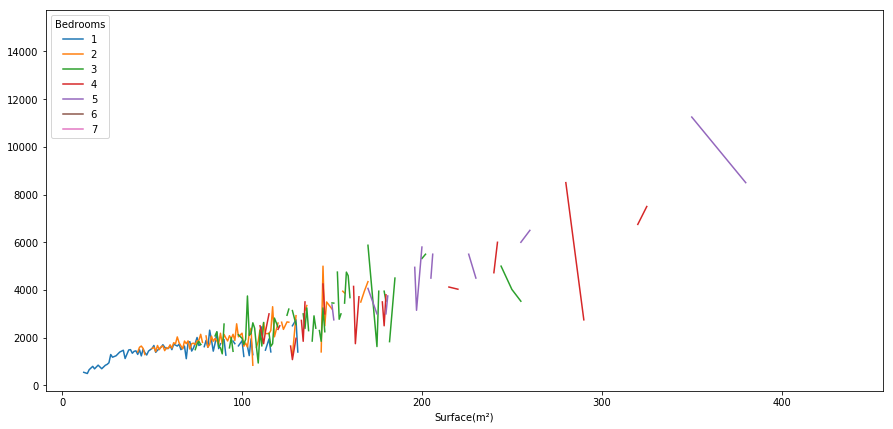

In [8]:
#Checking consistency of dataset by analyzing the relation among surface, bedroom number and price.
fig, ax = plt.subplots(figsize=(15,7))
bigparaius.groupby(["Surface(m²)","Bedrooms"]).mean()['Price (€)'].unstack().plot(ax=ax)

## 2.2 Format ExpatRental Data
get lat lon from packed string using custom functions

In [9]:
expatrental=expatrental[expatrental.Subtitle=='Amsterdam'] #300 gone
expatrental['Lat']=expatrental[['Location  latitude longitude'][0]].astype(str)
expatrental['Lon']=expatrental[['Location  latitude longitude'][0]].astype(str)
expatrental.head()

,Title,Subtitle,Description,Price,Monthly,Number,Location latitude longitude,Lat,Lon
0,Daniël Stalpertstraat,Amsterdam,Newly renovated (in 2017) unfurnished 2 bedroo...,2350,Unfurnished,2,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...
1,Tweede Helmersstraat NEW,Amsterdam,Our one bedroom ground floor apartment in the ...,1800,Furnished,1,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...
2,William Barlowlaan 125 NEW,Amsterdam,Beautiful luxury 3 bedroom apartment on one of...,1900,Furnished,3,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...
4,Kerkstraat NEW,Amsterdam,Up for rent in Amsterdam Centrum:This charming...,2250,Furnished,2,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...
8,Koopvaardersplantsoen NEW,Amsterdam,"Located on the top floor of a new building, is...",1350,Unfurnished,2,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...,https://www.expatrentals.eu/country/netherland...


In [10]:
B=expatrental['Location  latitude longitude'].str.strip('()')                               \
                   .str.split('&', expand=True) 
    
Lat=B[1].str.strip('()')                               \
                   .str.split('=', expand=True) 

Lon=B[2].str.strip('()')                               \
                   .str.split('=', expand=True) 


In [11]:
expatrental['Lat']=Lat[1].astype(float)
expatrental['Lon']=Lon[1].astype(float)
expatrental.drop(['Location  latitude longitude'], axis=1,inplace=True)


In [12]:
expatrental.columns

Index(['Title', 'Subtitle', 'Description', 'Price', 'Monthly', ' Number',
       'Lat', 'Lon'],
      dtype='object')

In [13]:
expatrental.rename(index=int, columns={"Title": "AdName", " Number": "Bedrooms", "Price": "Price (€)", "Monthly": "Furniture"},inplace=True )
expatrental.reset_index(drop=True,inplace=True)
#expatrental.drop(['level_0'], axis=1,inplace=True)
expatrental['Bedrooms']=expatrental['Bedrooms'].replace('Studio',0)

In [14]:
expatrental['Surface']=np.nan
count=0
l=[]
for i in range(len(expatrental['Description'])):
    expatrental['Description'][i] = expatrental['Description'][i].replace("(", "")
    expatrental['Description'][i] = expatrental['Description'][i].replace(")", "")
    expatrental['Description'][i] = expatrental['Description'][i].replace("(", "")
    expatrental['Description'][i] = expatrental['Description'][i].replace("(", "")
    expatrental['Description'][i] = expatrental['Description'][i].replace("(", "")
    

    if 'm2' in expatrental['Description'][i]:
        lokasyon=int(expatrental['Description'][i].find('m2'))
        
        string=expatrental['Description'][i][lokasyon-5:lokasyon]
        a=[int(s) for s in string.split() if s.isdigit()]
        if len(a)==1:
            expatrental['Surface'][i]=a[0]  
            count= count+1
            l.append(i)
            
            
    elif 'm 2' in expatrental['Description'][i]:
        lokasyon=int(expatrental['Description'][i].find('m 2'))  
        
        string=expatrental['Description'][i][lokasyon-5:lokasyon]
        a=[int(s) for s in string.split() if s.isdigit()]
        if len(a)==1:
            expatrental['Surface'][i]=a[0]  
            count= count+1
            l.append(i)
            
    elif 'square meter' in expatrental['Description'][i]:
        lokasyon=int(expatrental['Description'][i].find('square meter')) 
    
        string=expatrental['Description'][i][lokasyon-5:lokasyon]
        a=[int(s) for s in string.split() if s.isdigit()]
        if len(a)==1:
            expatrental['Surface'][i]=a[0]  
            count= count+1
            l.append(i)
            
print(count)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

328


In [15]:
expatrental.Surface[l].max()

305.0

In [16]:
expatr=expatrental.iloc[l]

In [17]:
expatr.reset_index(drop=True,inplace=True)
expatr.head()

,AdName,Subtitle,Description,Price (€),Furniture,Bedrooms,Lat,Lon,Surface
0,Kerkstraat NEW,Amsterdam,Up for rent in Amsterdam Centrum:This charming...,2250,Furnished,2,52.363255,4.901087,75.0
1,P. Hans Frankfurthersingel 128 NEW,Amsterdam,". H. Frankfurthersingel 120 m2 €1,650 Excl. G/...",1650,Unfurnished,2,52.346181,4.794840,120.0
2,De Klencke 93 NEW,Amsterdam,ENGLISH TRANSLATION BELOW | PARKING SPACE | ZU...,2100,Unfurnished,1,52.333517,4.885411,75.0
3,Amstelveenseweg 94 NEW,Amsterdam,Beautiful apartment located in the popular Ams...,2250,Unfurnished,1,52.355671,4.855006,70.0
4,Leidsekruisstraat 32 NEW,Amsterdam,ENGLISH TRANSLATION BELOW | Leidseplein | 2 be...,1700,Unfurnished,2,52.363414,4.884628,40.0


## 2.3 Format Perfect Housing Data

In [18]:
perfecthousing.columns

Index(['Content 1', 'Content 1_link', 'Content 2', 'Content 3', 'Bedrooms',
       'Surface(m²)', 'Price'],
      dtype='object')

In [19]:
perfecthousing.head()

,Content 1,Content 1_link,Content 2,Content 3,Bedrooms,Surface(m²),Price
0,"Korte Ouderkerkerdijk, Oost, Amsterdam",https://www.perfecthousing.com/rental-apartmen...,"Oost, Amsterdam","Apartment for rent in Korte Ouderkerkerdijk, A...",2,140,3500
1,"Rondeel, Buitenveldert, Amsterdam",https://www.perfecthousing.com/rental-apartmen...,"Buitenveldert, Amsterdam","Apartment for rent in Rondeel, Amsterdam. A co...",2,100,2250
2,"Herenmarkt, Historical Centrum, Amsterdam",https://www.perfecthousing.com/rental-apartmen...,"Historical Centrum, Amsterdam","Apartment for rent in Herenmarkt, Amsterdam. A...",3,150,3975
3,"Gustav Mahlerplein, Zuidas, Amsterdam",https://www.perfecthousing.com/rental-apartmen...,"Zuidas, Amsterdam","Apartment for rent in Gustav Mahlerplein , Ams...",2,104,2900
4,"Sarphatistraat, Plantage buurt, Amsterdam",https://www.perfecthousing.com/rental-apartmen...,"Plantage buurt, Amsterdam","Apartment for rent in Sarphatistraat , Amsterd...",2,100,2100


In [20]:
#perfecthousing

C=perfecthousing['Content 1'].str.strip('Amsterdam')                               \
                   .str.split(',', expand=True) 
    
perfecthousing['Street']=C[0].astype(str)
perfecthousing['Area']=C[1].astype(str)
perfecthousing.drop(columns=['Content 1_link', 'Content 3'],inplace=True)
perfecthousing.head() #done

,Content 1,Content 2,Bedrooms,Surface(m²),Price,Street,Area
0,"Korte Ouderkerkerdijk, Oost, Amsterdam","Oost, Amsterdam",2,140,3500,Korte Ouderkerkerdijk,Oost
1,"Rondeel, Buitenveldert, Amsterdam","Buitenveldert, Amsterdam",2,100,2250,Rondeel,Buitenveldert
2,"Herenmarkt, Historical Centrum, Amsterdam","Historical Centrum, Amsterdam",3,150,3975,Herenmarkt,Historical Centrum
3,"Gustav Mahlerplein, Zuidas, Amsterdam","Zuidas, Amsterdam",2,104,2900,Gustav Mahlerplein,Zuidas
4,"Sarphatistraat, Plantage buurt, Amsterdam","Plantage buurt, Amsterdam",2,100,2100,Sarphatistraat,Plantage buurt


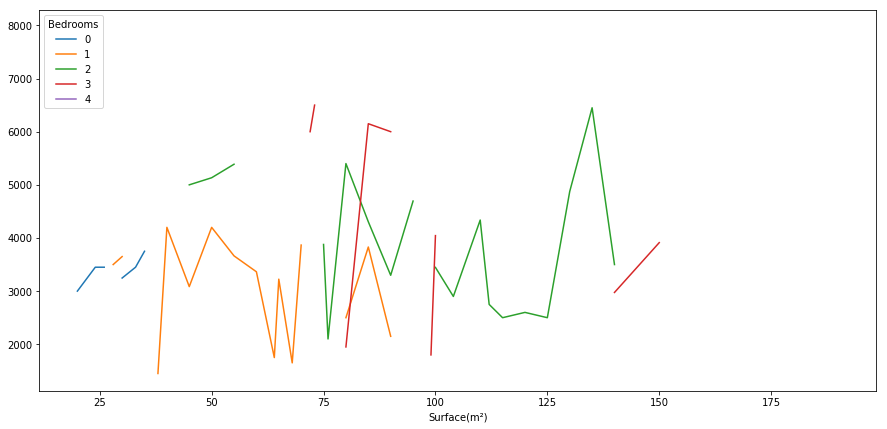

In [21]:
fig, ax = plt.subplots(figsize=(15,7))

perfecthousing.groupby(["Surface(m²)","Bedrooms"]).mean()['Price'].unstack().plot(ax=ax)

## 2.4 Assigning Missing Buurtcodes to expatrental from shapefiles
Expatrental has lat/lon however no Buurtcode. Buurtcodes are needed for merging CBS data to Rental data hence, needs assignment.
To assign Buurtcodes, the rental data is plotted on Amsterdam shapefile and the buurts are assigned to houses. 

In [22]:
from dbfread import DBF
import shapefile
import matplotlib.patches as mpatches


myshp = open("C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/Shapefiles/buurt_2017/buurt_2017.shp", "rb")
mydbf = open("C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/Shapefiles/buurt_2017/buurt_2017.dbf", "rb")
r = shapefile.Reader(shp=myshp, dbf=mydbf)

In [23]:
records= r.records()
shapes = r.shapes()
print(len(shapes),len(records))

13308 13308


In [24]:
Ashape=[]
for i in range(len(shapes)):
    if  records[i][4]=='Amsterdam':
        Ashape.append(i)

In [25]:
#conversion from latitue longitude to the buurtcode thing, trial and error, very time consuming

elatmax=expatrental['Lat'].max()
elatmin=expatrental['Lat'].min()

elonmax=expatrental['Lon'].max()
elonmin=expatrental['Lon'].min()

elatdif=expatrental['Lat'].max()-expatrental['Lat'].min()
elondif=expatrental['Lon'].max()-expatrental['Lon'].min()

latmax=491100     #y axis
latmin=478200     #482

lonmax=129300    #x axis #correct
lonmin=112600    #114   

londif=lonmax-lonmin
latdif=latmax-latmin

latslope=latdif/elatdif
lonslope=londif/elondif

blon=lonmax-(lonslope*elonmax)
blat=latmax-(latslope*elatmax)


print(latslope*elatmin+blat,latslope*elatmax+blat)
print(lonslope*elonmin+blon,lonslope*elonmax+blon)

478200.0 491100.0
112600.0 129300.0


In [26]:
import shapely
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface
from datetime import datetime


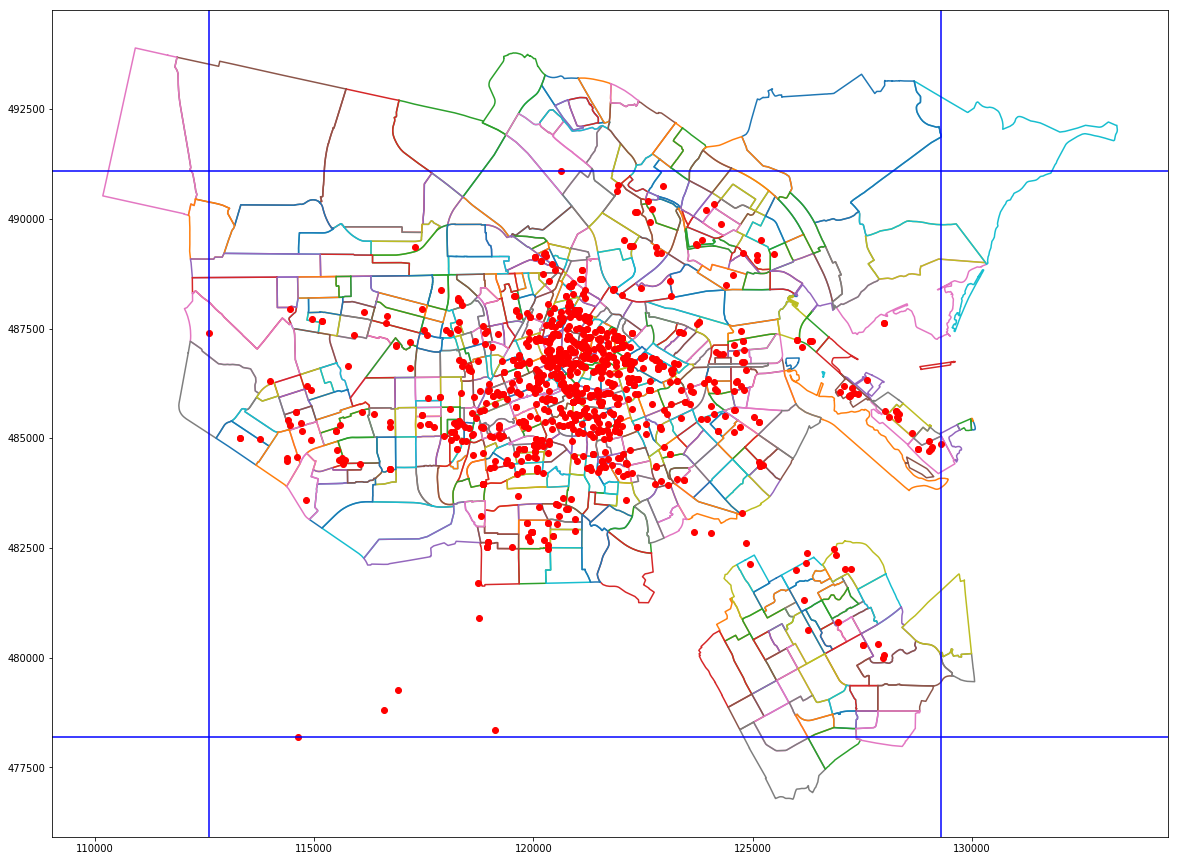

In [27]:
plt.figure(figsize=(20,20))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

#expatrental['encryption']=0
expatrental['newLat']=latslope*expatrental['Lat']+blat
expatrental['newLon']=lonslope*expatrental['Lon']+blon

num=0
records=r.records()
#shapes = sf.shapes()
#print(len(shapes),len(records))

for i in range(len(shapes)):
    if  records[i][4]=='Amsterdam':
        shape=r.shape(i)
        
        num=num+1
        if num>500:  #if something wrong or too long...
            break
            
        npoints=len(shape.points) # total points
        nparts = len(shape.parts) # total parts
        
        if nparts == 1:
            x_lon = np.zeros((len(shape.points),1))
            y_lat = np.zeros((len(shape.points),1))
            for ip in range(len(shape.points)):
                x_lon[ip] = shape.points[ip][0]
                y_lat[ip] = shape.points[ip][1]
            plt.plot(x_lon,y_lat)


        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = npoints

            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]
            plt.plot(x_lon,y_lat)
            
for i in range(len(expatrental['newLat'])):
    plt.plot(expatrental['newLon'][i],expatrental['newLat'][i], 'ro')

    
plt.axhline(y=latslope*elatmin+blat, color='b', linestyle='-')
plt.axhline(y=latslope*elatmax+blat, color='b', linestyle='-')
plt.axvline(x=lonslope*elonmin+blon, color='b', linestyle='-')
plt.axvline(x=lonslope*elonmax+blon, color='b', linestyle='-')



#plt.ylim(23,50)
plt.show()

In [28]:
expatrental['newLat']=latslope*expatrental['Lat']+blat
expatrental['newLon']=lonslope*expatrental['Lon']+blon

In [29]:
expatrental['encryption']=''
records=r.records()
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface
for j in range(len(expatrental['newLat'])):
    pt=(expatrental['newLon'][j],expatrental['newLat'][j])
    for i in Ashape:
        boundary=shapes[i]
        if Point(pt).within(shape(boundary)): # make a point and see if it's in the polygon
            expatrental['encryption'][j]=records[i][0]
            break
expatrental

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,AdName,Subtitle,Description,Price (€),Furniture,Bedrooms,Lat,Lon,Surface,newLat,newLon,encryption
0,Daniël Stalpertstraat,Amsterdam,Newly renovated in 2017 unfurnished 2 bedroom ...,2350,Unfurnished,2,52.356184,4.889818,NaN,485519.287135,121041.191019,BU03632402
1,Tweede Helmersstraat NEW,Amsterdam,Our one bedroom ground floor apartment in the ...,1800,Furnished,1,52.364287,4.875944,NaN,486280.954421,120102.731505,BU03632001
2,William Barlowlaan 125 NEW,Amsterdam,Beautiful luxury 3 bedroom apartment on one of...,1900,Furnished,3,52.360940,4.980939,NaN,485966.319816,127204.733899,BU03633501
3,Kerkstraat NEW,Amsterdam,Up for rent in Amsterdam Centrum:This charming...,2250,Furnished,2,52.363255,4.901087,75.0,486183.947098,121803.423880,BU03630303
4,Koopvaardersplantsoen NEW,Amsterdam,"Located on the top floor of a new building, is...",1350,Unfurnished,2,52.403031,4.913668,NaN,489922.912012,122654.449865,BU03636001
5,P. Hans Frankfurthersingel 128 NEW,Amsterdam,". H. Frankfurthersingel 120 m2 €1,650 Excl. G/...",1650,Unfurnished,2,52.346181,4.794840,120.0,484579.030495,114616.734207,BU03638402
6,Haringpakkerssteeg 17 NEW,Amsterdam,In the heart of Amsterdam is a 2-minute distan...,2100,Unfurnished,2,52.377021,4.896829,NaN,487477.970270,121515.419489,BU03630001
7,Joubertstraat 25 NEW,Amsterdam,**not available for sharers**In the attractive...,1575,Unfurnished,2,52.352769,4.917310,NaN,485198.232375,122900.780268,BU03633000
8,Warmoesstraat 16 NEW,Amsterdam,Apartment for rent in Warmoesstraat AmsterdamA...,2500,Unfurnished,2,52.376053,4.899101,NaN,487386.950705,121669.087669,BU03630002
9,IJdoornlaan 42 NEW,Amsterdam,"Now for rent, a delicious light and new 4-room...",1550,Unfurnished,3,52.395276,4.955600,NaN,489193.900098,125490.797300,BU03636805


In [30]:
expatrental.head()

,AdName,Subtitle,Description,Price (€),Furniture,Bedrooms,Lat,Lon,Surface,newLat,newLon,encryption
0,Daniël Stalpertstraat,Amsterdam,Newly renovated in 2017 unfurnished 2 bedroom ...,2350,Unfurnished,2,52.356184,4.889818,NaN,485519.287135,121041.191019,BU03632402
1,Tweede Helmersstraat NEW,Amsterdam,Our one bedroom ground floor apartment in the ...,1800,Furnished,1,52.364287,4.875944,NaN,486280.954421,120102.731505,BU03632001
2,William Barlowlaan 125 NEW,Amsterdam,Beautiful luxury 3 bedroom apartment on one of...,1900,Furnished,3,52.360940,4.980939,NaN,485966.319816,127204.733899,BU03633501
3,Kerkstraat NEW,Amsterdam,Up for rent in Amsterdam Centrum:This charming...,2250,Furnished,2,52.363255,4.901087,75.0,486183.947098,121803.423880,BU03630303
4,Koopvaardersplantsoen NEW,Amsterdam,"Located on the top floor of a new building, is...",1350,Unfurnished,2,52.403031,4.913668,NaN,489922.912012,122654.449865,BU03636001


## 2.5 Assigning buurtcode to paraius from street names
Paraius dataset requires buurtcode which is assigned from which street house located is

In [31]:
expatdic=expatrental[expatrental['encryption']!=0].reset_index(drop=True) #drop no buurtcode assigned houses
expatdic['StreetName']=''
expatdic.head()


,AdName,Subtitle,Description,Price (€),Furniture,Bedrooms,Lat,Lon,Surface,newLat,newLon,encryption,StreetName
0,Daniël Stalpertstraat,Amsterdam,Newly renovated in 2017 unfurnished 2 bedroom ...,2350,Unfurnished,2,52.356184,4.889818,NaN,485519.287135,121041.191019,BU03632402,
1,Tweede Helmersstraat NEW,Amsterdam,Our one bedroom ground floor apartment in the ...,1800,Furnished,1,52.364287,4.875944,NaN,486280.954421,120102.731505,BU03632001,
2,William Barlowlaan 125 NEW,Amsterdam,Beautiful luxury 3 bedroom apartment on one of...,1900,Furnished,3,52.360940,4.980939,NaN,485966.319816,127204.733899,BU03633501,
3,Kerkstraat NEW,Amsterdam,Up for rent in Amsterdam Centrum:This charming...,2250,Furnished,2,52.363255,4.901087,75.0,486183.947098,121803.423880,BU03630303,
4,Koopvaardersplantsoen NEW,Amsterdam,"Located on the top floor of a new building, is...",1350,Unfurnished,2,52.403031,4.913668,NaN,489922.912012,122654.449865,BU03636001,


In [32]:
for i in range(len(expatdic['encryption'])):
    expatdic['AdName'][i]=expatdic['AdName'][i].replace(" NEW", "")
    expatdic['AdName'][i]=expatdic['AdName'][i].replace("NEW", "")
    s=expatdic['AdName'][i]
    result = ''.join(i for i in s if not i.isdigit())
    expatdic['StreetName'][i]=result.rstrip()
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
expatdic.tail()

,AdName,Subtitle,Description,Price (€),Furniture,Bedrooms,Lat,Lon,Surface,newLat,newLon,encryption,StreetName
1057,Kromme Waal,Amsterdam,"For rent in Kromme Waal, Amsterdam A spacious ...",2250,Unfurnished,2,52.374407,4.902551,110.0,487232.246584,121902.444413,BU03630404,Kromme Waal
1058,Oosterpark,Amsterdam,Details: • Size of the property: 125 m2 • Numb...,2650,Furnished,2,52.358847,4.920679,125.0,485769.607389,123128.658043,BU03632801,Oosterpark
1059,Utrechtsedwarsstraat,Amsterdam,"GLADLY YOUR ATTENTION, NOW LOWERED IN PRICE!! ...",2650,Furnished,2,52.361509,4.899240,NaN,486019.843043,121678.456030,BU03630706,Utrechtsedwarsstraat
1060,Brouwersgracht,Amsterdam,NEW OFFER!! Nicely renovated and stylishly fur...,2750,Furnished,2,52.380886,4.888194,NaN,487841.221336,120931.347830,BU03630201,Brouwersgracht
1061,Singel,Amsterdam,Details: Size of the property: m2 approximatel...,2750,Furnished,2,52.372759,4.890958,NaN,487077.279265,121118.315967,BU03630105,Singel


In [34]:
encdic={}
for i in range(len(expatdic['encryption'])):
    key=expatdic['encryption'][i]
    # if expatdic['StreetName'] not in encdic.values() try to make it more beautifl???!!! help
    encdic.setdefault(key,[]).append(expatdic['StreetName'][i])
encdic.keys()

dict_keys(['BU03632402', 'BU03632001', 'BU03633501', 'BU03630303', 'BU03636001', 'BU03638402', 'BU03630001', 'BU03633000', 'BU03630002', 'BU03636805', 'BU03632304', 'BU03634500', '', 'BU03639997', 'BU03630703', 'BU03639501', 'BU03639400', 'BU03633702', 'BU03635202', 'BU03637106', 'BU03632002', 'BU03630200', 'BU03636300', 'BU03630803', 'BU03636000', 'BU03633200', 'BU03631303', 'BU03630405', 'BU03630606', 'BU03634709', 'BU03630502', 'BU03635400', 'BU03634501', 'BU03630202', 'BU03634705', 'BU03630406', 'BU03633100', 'BU03638001', 'BU03633306', 'BU03630610', 'BU03635300', 'BU03633803', 'BU03635101', 'BU03634702', 'BU03638104', 'BU03630104', 'BU03633305', 'BU03630604', 'BU03634203', 'BU03638700', 'BU03638903', 'BU03638202', 'BU03634802', 'BU03630300', 'BU03630306', 'BU03630804', 'BU03630404', 'BU03632404', 'BU03630707', 'BU03638100', 'BU03637800', 'BU03632000', 'BU03634402', 'BU03634903', 'BU03630105', 'BU03632200', 'BU03630800', 'BU03630503', 'BU03631800', 'BU03631601', 'BU03639301', 'BU03

In [35]:
encdic['BU03630107']

['Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Kalverstraat',
 'Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Keizersgracht',
 'Kuiperssteeg',
 'Sint Luciensteeg',
 'Rokin',
 'Keizersgracht']

In [36]:
encdic.values()  #kade,plein,straat, weg, dijk , racht 

dict_values([['Daniël Stalpertstraat', 'Daniel Stalpertstraat', 'Stadhouderskade, Suite rd floor', 'Stadhouderskade', 'Daniël Stalpertstraat', 'Dani&#;l Stalpertstraat', 'Stadhouderskade', 'Saenredamstraat', 'Frans Halsstraat', 'Marie Heinekenplein', 'Marie Heinekenplein', 'Marie Heinekenplein', 'Daniël Stalpertstraat', 'Saenredamstraat', 'Quellijnstraat', 'Quellijnstraat', 'Quellijnstraat', 'Stadhouderskade', 'Marie Heinekenplein', 'Marie Heinekenplein', 'Frans Halsstraat'], ['Tweede Helmersstraat', 'Eerste Helmersstraat', 'Tweede Helmersstraat', 'Tweede Constantijn Huygensstraat', 'Tweede Helmersstraat', 'Jacob van Lennepkade', 'Tweede Constantijn Huygensstraat'], ['William Barlowlaan', 'IJburglaan', 'William Barlowlaan', 'IJburglaan', 'IJburglaan', 'IJburglaan', 'William Barlowlaan', 'William Barlowlaan', 'Jan Olphert Vaillantlaan'], ['Kerkstraat', 'Amstel', 'Amstel', 'Nieuwe Herengracht', 'Herengracht', 'Keizersgracht', 'Amstelstraat', 'Keizersgracht'], ['Koopvaardersplantsoen'], [

In [37]:
bigparaius

,AdName,UniqueLink,Zipcode,Area,Description,Estate Agent,Surface(m²),Bedrooms,Furniture,Price (€),Month
0,Apartment Van Tuyll van Serooskerkenplein,https://www.pararius.com/apartment-for-rent/am...,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",Relocation-Amsterdam,140,3,furnished,2995,(ex.)
1,Apartment Lanseloetstraat,https://www.pararius.com/apartment-for-rent/am...,1055 BD,Stadsdeel West,Beautiful recently renovated apartment. Very s...,Out Amsterdam,120,3,furnished,1950,(ex.)
2,Studio Beethovenstraat,https://www.pararius.com/studio-for-rent/amste...,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,Nuverhuren.nl,18,1,furnished,900,(incl.)
3,Apartment Titus van Rijnstraat,https://www.pararius.com/apartment-for-rent/am...,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,Amsterdam Rentals,85,2,furnished,1900,(ex.)
4,Apartment Uiterwaardenstraat,https://www.pararius.com/apartment-for-rent/am...,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",Koops Makelaardij Amstelveen,85,2,furnished or unfurnished,2200,(ex.)
5,Apartment De Klencke,https://www.pararius.com/apartment-for-rent/am...,1083 HH,Stadsdeel Zuid,Beautiful apartment with a sunny terrace. The ...,+31 Vastgoed,63,1,furnished,1800,(ex.)
6,Apartment IJselstraat,https://www.pararius.com/apartment-for-rent/am...,1078 CG,Stadsdeel Zuid,Spacious one bedroom apartment divided over 2 ...,Expats. Amsterdam Rentals,75,1,furnished,1500,(ex.)
7,Apartment Admiraal De Ruijterweg,https://www.pararius.com/apartment-for-rent/am...,1055 MX,Stadsdeel West,"123makelaar biedt hierbij een prachtig, nieuw ...",123makelaar,48,1,unfurnished,1350,(ex.)
8,Apartment Rooseveltlaan,https://www.pararius.com/apartment-for-rent/am...,1078 NW,Stadsdeel Zuid,Beautiful fully renovated 3-room apartment on ...,Nico Tel Makelaars,95,2,unfurnished,2100,(ex.)
9,Apartment Keizersgracht,https://www.pararius.com/apartment-for-rent/am...,1016 EK,Stadsdeel Centrum,"Keizersgracht 405-III+IV, 1016 EK Amsterdam Un...",Engel en Volkers Amsterdam Centrum,208,3,furnished,7950,(ex.)


In [38]:
startTime = datetime.now()
for i in range(len(bigparaius['AdName'])):
    if i%100==0:
        print(i+1,'th step',datetime.now() - startTime, 'passed')
        
    #remove Apartment
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Apartment ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace("Apartment ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Apartment", "")
    
    #remove Apartment
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Room ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace("Room ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Room", "")
    
    #remove Apartment
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Studio ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace("Studio ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Studio", "")
    
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Family house ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace("Family house ", "")
    bigparaius['AdName'][i]=bigparaius['AdName'][i].replace(" Family house", "")


bigparaius

1 th step 0:00:00 passed


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is tryi

101 th step 0:02:39.617802 passed
201 th step 0:05:20.727229 passed
301 th step 0:08:09.034579 passed
401 th step 0:10:53.452374 passed
501 th step 0:13:30.273225 passed
601 th step 0:16:07.487155 passed
701 th step 0:18:48.598680 passed
801 th step 0:21:28.573425 passed
901 th step 0:24:10.623762 passed
1001 th step 0:26:56.893394 passed
1101 th step 0:29:35.142498 passed
1201 th step 0:32:14.008706 passed
1301 th step 0:35:11.079696 passed
1401 th step 0:37:31.593453 passed
1501 th step 0:39:51.081576 passed
1601 th step 0:42:10.465972 passed
1701 th step 0:44:28.678152 passed


,AdName,UniqueLink,Zipcode,Area,Description,Estate Agent,Surface(m²),Bedrooms,Furniture,Price (€),Month
0,Van Tuyll van Serooskerkenplein,https://www.pararius.com/apartment-for-rent/am...,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",Relocation-Amsterdam,140,3,furnished,2995,(ex.)
1,Lanseloetstraat,https://www.pararius.com/apartment-for-rent/am...,1055 BD,Stadsdeel West,Beautiful recently renovated apartment. Very s...,Out Amsterdam,120,3,furnished,1950,(ex.)
2,Beethovenstraat,https://www.pararius.com/studio-for-rent/amste...,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,Nuverhuren.nl,18,1,furnished,900,(incl.)
3,Titus van Rijnstraat,https://www.pararius.com/apartment-for-rent/am...,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,Amsterdam Rentals,85,2,furnished,1900,(ex.)
4,Uiterwaardenstraat,https://www.pararius.com/apartment-for-rent/am...,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",Koops Makelaardij Amstelveen,85,2,furnished or unfurnished,2200,(ex.)
5,De Klencke,https://www.pararius.com/apartment-for-rent/am...,1083 HH,Stadsdeel Zuid,Beautiful apartment with a sunny terrace. The ...,+31 Vastgoed,63,1,furnished,1800,(ex.)
6,IJselstraat,https://www.pararius.com/apartment-for-rent/am...,1078 CG,Stadsdeel Zuid,Spacious one bedroom apartment divided over 2 ...,Expats. Amsterdam Rentals,75,1,furnished,1500,(ex.)
7,Admiraal De Ruijterweg,https://www.pararius.com/apartment-for-rent/am...,1055 MX,Stadsdeel West,"123makelaar biedt hierbij een prachtig, nieuw ...",123makelaar,48,1,unfurnished,1350,(ex.)
8,Rooseveltlaan,https://www.pararius.com/apartment-for-rent/am...,1078 NW,Stadsdeel Zuid,Beautiful fully renovated 3-room apartment on ...,Nico Tel Makelaars,95,2,unfurnished,2100,(ex.)
9,Keizersgracht,https://www.pararius.com/apartment-for-rent/am...,1016 EK,Stadsdeel Centrum,"Keizersgracht 405-III+IV, 1016 EK Amsterdam Un...",Engel en Volkers Amsterdam Centrum,208,3,furnished,7950,(ex.)


In [39]:
unique=[]
for element in encdic.values():
    if type(element)==list:
        for x in element:
            unique.append(x)
    else:
        unique.append(element)
        
unique=set(unique)

In [40]:
unique

{'AMSTELVEEN, Valreep',
 'ARCHIMEDESWEG',
 'Aakpad',
 'Adamello',
 'Admiraal De Ruijterweg',
 'Admiraal de Ruijterweg',
 'Afroditekade',
 'Albatrospad',
 'Albert Cuypstraat',
 'Albrecht Durerstraat',
 'Alexander Boersstraat',
 'Alexanderkade',
 'Alkmaarstraat',
 'Amazonenstraat',
 'Amstel',
 'Amsteldijk',
 'Amstelstraat',
 'Amstelveenseweg',
 'Amstelveenseweg, Suite Suite A,A,A,A',
 'Amsterdam-Old South, Stadhouderskade, Suite',
 'Amsterdam-South, Van der Madeweg',
 'Anton Verheijstraat',
 'Antonio Vivaldistraat',
 'Apollolaan',
 'Archimedeplantsoen',
 'Argonautenstraat',
 'Azaleastraat',
 'B. Merkelbachsingel',
 'BEULINGSTRAAT',
 'BROUWERSGRACHT',
 'Baarsjesweg',
 'Bachstraat',
 'Baden Powellweg',
 'Bakkersstraat',
 'Bakkerstraat',
 'Balthazar Florisstraat',
 'Bankastraat',
 'Banne Buikslootlaan',
 'Barcelonaplein',
 'Barentszplein',
 'Baron G.A. Tindalplein',
 'Beemsterstraat',
 'Beethovenstraat',
 'Bellamystraat',
 'Ben van Meerendonkstraat',
 'Bercylaan',
 'Berenstraat',
 'Bertrand

In [41]:
bigparaius['Locatability']=0
Ap=[]
for i in range(len(bigparaius['AdName'])):
    if bigparaius['AdName'][i] in unique:
        bigparaius['Locatability'][i]=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [42]:
bigparaius['Locatability'].sum()

1238

In [43]:
Paraius=bigparaius[bigparaius['Locatability']==1]
Paraius.reset_index(drop=True,inplace=True)
Paraius.tail()

,AdName,UniqueLink,Zipcode,Area,Description,Estate Agent,Surface(m²),Bedrooms,Furniture,Price (€),Month,Locatability
1233,Koninginneweg,https://www.pararius.com/apartment-for-rent/am...,1075 CK,Stadsdeel Zuid,"In the popular neighborhood willemspark, we of...",Haagen & Partners,150,4,unfurnished,3500,(ex.),1
1234,Vierwindendwarsstraat,https://www.pararius.com/apartment-for-rent/am...,1013 LB,Stadsdeel Centrum,The Old Center Serviced Apartments offer eight...,Rotterdam Apartments,95,2,furnished,4599,(incl.),1
1235,Quellijnstraat,https://www.pararius.com/apartment-for-rent/am...,1072 XW,Stadsdeel Zuid,These apartments are located in the middle of ...,Rotterdam Apartments,75,1,furnished,3999,(incl.),1
1236,Henriëtte Bosmansstraat,https://www.pararius.com/family-house-for-rent...,1077 XJ,Stadsdeel Zuid,"Spacious, semi-furnished familyhome (120 m2) n...",A1 Executive Estate,120,3,shell,2450,(ex.),1
1237,Eerste Helmersstraat,https://www.pararius.com/apartment-for-rent/am...,1054 DV,Stadsdeel West,Very nice furnished 2 bedroom ground floor apa...,A1 Executive Estate,110,2,shell,2700,(ex.),1


In [44]:
asd=0
Paraius['encryption']=''
startTime=datetime.now()

for i in range(len(Paraius['AdName'])):
    
    for element in encdic.keys():
        alist=encdic[element]
        for j in range(len(alist)):
            
            if alist[j]==Paraius['AdName'][i]:
                Paraius['encryption'][i]=element
                asd=1
                break
        if asd==1:
            break
            
    asd=0
    if i%100==0:
        print(i,'assigned in',datetime.now() - startTime)
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0 assigned in 0:00:00.249544
100 assigned in 0:00:23.674638
200 assigned in 0:00:47.640267
300 assigned in 0:01:10.998397
400 assigned in 0:01:34.488942
500 assigned in 0:01:57.860680
600 assigned in 0:02:21.383508
700 assigned in 0:02:44.997005
800 assigned in 0:03:08.277692
900 assigned in 0:03:32.645861
1000 assigned in 0:03:56.417575
1100 assigned in 0:04:19.717380
1200 assigned in 0:04:44.031693


In [45]:
len(Paraius['encryption'].unique())

207

In [46]:
Paraius_save=Paraius
Expat_save=expatdic

# 2.6 Merge Paraius and Expatrental
Both Paraius and Expatrental has buurtcode in it, now merge them together.
Also add area since from matching buurtcodes

In [47]:
Paraius.head()

,AdName,UniqueLink,Zipcode,Area,Description,Estate Agent,Surface(m²),Bedrooms,Furniture,Price (€),Month,Locatability,encryption
0,Van Tuyll van Serooskerkenplein,https://www.pararius.com/apartment-for-rent/am...,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",Relocation-Amsterdam,140,3,furnished,2995,(ex.),1,BU03634801
1,Beethovenstraat,https://www.pararius.com/studio-for-rent/amste...,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,Nuverhuren.nl,18,1,furnished,900,(incl.),1,BU03634903
2,Titus van Rijnstraat,https://www.pararius.com/apartment-for-rent/am...,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,Amsterdam Rentals,85,2,furnished,1900,(ex.),1,BU03638701
3,Uiterwaardenstraat,https://www.pararius.com/apartment-for-rent/am...,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",Koops Makelaardij Amstelveen,85,2,furnished or unfurnished,2200,(ex.),1,BU03635203
4,De Klencke,https://www.pararius.com/apartment-for-rent/am...,1083 HH,Stadsdeel Zuid,Beautiful apartment with a sunny terrace. The ...,+31 Vastgoed,63,1,furnished,1800,(ex.),1,BU03632304


In [48]:
Paraius.rename(columns={'Surface(m²)': 'Surface (m²)', 'Month': "Monthly"}, inplace=True)
Paraius.drop(columns=['UniqueLink','Locatability','Estate Agent'],inplace=True)
Paraius['Site']='Paraius'
Paraius.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel packa

,AdName,Zipcode,Area,Description,Surface (m²),Bedrooms,Furniture,Price (€),Monthly,encryption,Site
0,Van Tuyll van Serooskerkenplein,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",140,3,furnished,2995,(ex.),BU03634801,Paraius
1,Beethovenstraat,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,18,1,furnished,900,(incl.),BU03634903,Paraius
2,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85,2,furnished,1900,(ex.),BU03638701,Paraius
3,Uiterwaardenstraat,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",85,2,furnished or unfurnished,2200,(ex.),BU03635203,Paraius
4,De Klencke,1083 HH,Stadsdeel Zuid,Beautiful apartment with a sunny terrace. The ...,63,1,furnished,1800,(ex.),BU03632304,Paraius


In [49]:
expatdic.drop(columns=['AdName'],inplace=True)
expatdic.rename(columns={'Surface': 'Surface (m²)', 'StreetName':'AdName'},inplace=True)
expatdic.drop(columns=['Subtitle'],inplace=True)
expatdic['Site']='ExpatRental'
expatdic.tail()

,Description,Price (€),Furniture,Bedrooms,Lat,Lon,Surface (m²),newLat,newLon,encryption,AdName,Site
1057,"For rent in Kromme Waal, Amsterdam A spacious ...",2250,Unfurnished,2,52.374407,4.902551,110.0,487232.246584,121902.444413,BU03630404,Kromme Waal,ExpatRental
1058,Details: • Size of the property: 125 m2 • Numb...,2650,Furnished,2,52.358847,4.920679,125.0,485769.607389,123128.658043,BU03632801,Oosterpark,ExpatRental
1059,"GLADLY YOUR ATTENTION, NOW LOWERED IN PRICE!! ...",2650,Furnished,2,52.361509,4.899240,NaN,486019.843043,121678.456030,BU03630706,Utrechtsedwarsstraat,ExpatRental
1060,NEW OFFER!! Nicely renovated and stylishly fur...,2750,Furnished,2,52.380886,4.888194,NaN,487841.221336,120931.347830,BU03630201,Brouwersgracht,ExpatRental
1061,Details: Size of the property: m2 approximatel...,2750,Furnished,2,52.372759,4.890958,NaN,487077.279265,121118.315967,BU03630105,Singel,ExpatRental


In [50]:
expatdic.head()

,Description,Price (€),Furniture,Bedrooms,Lat,Lon,Surface (m²),newLat,newLon,encryption,AdName,Site
0,Newly renovated in 2017 unfurnished 2 bedroom ...,2350,Unfurnished,2,52.356184,4.889818,NaN,485519.287135,121041.191019,BU03632402,Daniël Stalpertstraat,ExpatRental
1,Our one bedroom ground floor apartment in the ...,1800,Furnished,1,52.364287,4.875944,NaN,486280.954421,120102.731505,BU03632001,Tweede Helmersstraat,ExpatRental
2,Beautiful luxury 3 bedroom apartment on one of...,1900,Furnished,3,52.360940,4.980939,NaN,485966.319816,127204.733899,BU03633501,William Barlowlaan,ExpatRental
3,Up for rent in Amsterdam Centrum:This charming...,2250,Furnished,2,52.363255,4.901087,75.0,486183.947098,121803.423880,BU03630303,Kerkstraat,ExpatRental
4,"Located on the top floor of a new building, is...",1350,Unfurnished,2,52.403031,4.913668,NaN,489922.912012,122654.449865,BU03636001,Koopvaardersplantsoen,ExpatRental


In [51]:
rentaldata = Paraius.merge(expatdic, how='outer')
rentaldata.reset_index(drop=True,inplace=True)


In [52]:
#Area names are mising so add them via buurtcode

In [53]:
dicdic={}
for i in range(len(rentaldata.encryption)):
    keys=rentaldata.Area[i]
    if rentaldata.encryption[i] not in dicdic.values():
        dicdic.setdefault(keys,[]).append(rentaldata['encryption'][i])
    

In [54]:
for element in dicdic.keys():
    print(element)
#type(list(dicdic.keys())[-1])

Stadsdeel Zuid
Stadsdeel Nieuw-West
Stadsdeel West
Stadsdeel Centrum
Stadsdeel Oost
Stadsdeel Zuidoost
Stadsdeel Westpoort
Stadsdeel Noord
nan


In [55]:
app=0
for i in range(len(rentaldata.encryption)):
    if type(rentaldata.Area[i])==float:
        
        for element in dicdic.keys():
        
            if type(element) != float:
            
                axs=dicdic[element]
                
                for j in range(len(axs)):
                    if axs[j]==rentaldata.encryption[i]:
                        rentaldata.Area[i]=element
                        app=1
                        break
                if app==1:
                    break
        app=0
                

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [56]:
rentaldata[['Area','encryption']][:10]

,Area,encryption
0,Stadsdeel Zuid,BU03634801
1,Stadsdeel Zuid,BU03634903
2,Stadsdeel Nieuw-West,BU03638701
3,Stadsdeel Nieuw-West,BU03638701
4,Stadsdeel Zuid,BU03635203
5,Stadsdeel Zuid,BU03632304
6,Stadsdeel Zuid,BU03632602
7,Stadsdeel West,BU03633704
8,Stadsdeel Zuid,BU03635202
9,Stadsdeel Centrum,BU03630303


In [57]:
rentaldata.head()

,AdName,Zipcode,Area,Description,Surface (m²),Bedrooms,Furniture,Price (€),Monthly,encryption,Site,Lat,Lon,newLat,newLon
0,Van Tuyll van Serooskerkenplein,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",140.0,3,furnished,2995,(ex.),BU03634801,Paraius,NaN,NaN,NaN,NaN
1,Beethovenstraat,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,18.0,1,furnished,900,(incl.),BU03634903,Paraius,NaN,NaN,NaN,NaN
2,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,Paraius,NaN,NaN,NaN,NaN
3,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,Paraius,NaN,NaN,NaN,NaN
4,Uiterwaardenstraat,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",85.0,2,furnished or unfurnished,2200,(ex.),BU03635203,Paraius,NaN,NaN,NaN,NaN


# 3. CBS 2017 Preparation

## 3.1 CBSdata translating

In [58]:
print('df 2017 number of columns', df2017.shape)
df2017.columns = map(str.lower, df2017.columns)


df 2017 number of columns (16667, 108)


In [59]:
#a dictionary that contains translation and normalize different dutch column names into unified english version
TranslationDic={"gwb_code_10": "regioncode","gwb_code_8": "regionnumber","regio": "region indication", \
                "gm_naam": "municipal name", "recs": "type of region", "gwb_code": "encryption", \
                "ind_wbi": "classification change neighborhoods and neighborhoods", "a_inw": "number of inhabitants", \
                "a_man": "men", "a_vrouw": "women", "a_00_14": "0 to 14 years", "a_15_24": "15 to 24 years", \
                "a_25_44": "25 to 44 years", "a_45_64": "45 to 64 years", "a_65_oo": "65 years or older",\
                "a_ongeh": "unmarried", "a_gehuwd": "married", "a_gesch": "divorced", "a_verwed": "widowed", \
                "a_w_all": "western total", "a_nw_all": "non-western total", "a_marok": "morocco",\
                "a_antaru": "netherlands antilles and aruba", "a_suri": "suriname", "a_tur": "turkey",\
                "a_ov_nw": "other non-western", "a_geb": "birth total", "p_geb": "birth relative", \
                "a_ste": "total mortality", "p_ste": "mortality relative", "a_hh": "households total", \
                "a_1p_hh": "single-person households", "a_hh_z_k": "households without children", \
                "a_hh_m_k": "households with children", "g_hhgro": "average household size",\
                "bev_dich": "population density", "a_woning": "housing stock", "g_woz": "average house value", \
                "p_1gezw": "percentage of single-family dwelling", "p_mgezw": "percentage of multi-family dwelling",\
                "p_bewndw": "percentage inhabited", "p_leegsw": "percentage uninhabited", "p_koopw": "owned by resident",\
                "p_huurw": "rental housing total", "p_wcorpw": "owned housing corporation", \
                "p_ov_hw": "owned by other landlords", "p_e_o_w": "property unknown",\
                "p_bjj2k": "year of construction before 2000", "p_bjo2k": "year of construction after 2000",\
                "g_ele": "average total electricity consumption", "g_ele_ap": "ele_apartment", "g_ele_tw": "ele_middle house",\
                "g_ele_hw": "ele_corner house", "g_ele_2w": "ele_two-under-one-roof house", \
                "g_ele_vw": "ele_detached house", "g_ele_hu": "ele_rental home", "g_ele_ko": "ele_own home", \
                "g_gas": "average total gas consumption", "g_gas_ap": "gas_apartment",\
                "g_gas_tw": "gas_house between housese", "g_gas_hw": "gas_corner house", \
                "g_gas_2w": "gas_two-under-one-roof house", "g_gas_vw": "gas_detached house",\
                "g_gas_hu": "gas_rental home", "g_gas_ko": "gas_own home",\
                "p_stadsv": "percentage of homes with district heating", "a_inkont": "number of income recipients",\
                "g_ink_po": "average income per income recipient", "g_ink_pi": "average income per inhabitant", \
                "p_ink_li": "40% people with the lowest income", "p_ink_hi": "20% people with the highest income",\
                "p_n_act": "actives 15-75 years", "p_hh_li": "40% households with the lowest income", \
                "p_hh_hi": "20% households with the highest income", "p_hh_lkk": "households with a low income", \
                "p_hh_osm": "home below or around social minimum", "a_soz_wb": "persons per type of benefit; assistance", \
                "a_soz_ao": "persons by type of benefit; ao", "a_soz_ww": "persons by type of benefit; ww", \
                "a_soz_ow": "persons by type of benefit; aow", "a_bedv": "total business locations", \
                "a_bed_a": "a agriculture forestry and fishing", "a_bed_bf": "b-f industry and energy",\
                "a_bed_gi": "g + i trade and catering", "a_bed_hj": "h + j transport information and communication",\
                "a_bed_kl": "k-l financial services real estate", "a_bed_mn": "m-n business services",\
                "a_bed_ru": "r-u culture recreation other services", "a_pau": "passenger cars total", \
                "a_lftj6j": "passenger cars; younger than 6 years", "a_lfto6j": "passenger cars; 6 years and older", \
                "a_bst_b": "passenger cars; fuel gasoline", "a_bst_nb": "passenger cars; other fuel", \
                "g_pau_hh": "passenger cars per household", "g_pau_km": "passenger cars by surface", \
                "a_bau": "commercial vehicles", "a_m2w": "motorcycles", "g_afs_hp": "distance to gp practice;", \
                "g_afs_gs": "distance to large supermarket", "g_afs_kv": "distance to nursery", \
                "g_afs_sc": "distance to school", "g_3km_sc": "schools within 3 km", "a_opp_ha": "total area",\
                "a_lan_ha": "land area", "a_wat_ha": "surface water", "pst_mvp": "most common zip code",\
                "pst_dekp": "coverage percentage", "ste_mvs": "degree of urbanity", "ste_oad": "environmental address density",\
                "a_inkont_2014": "number of income recipients", "g_ink_po_2014": "average income per recipient", \
                "g_ink_pi_2014": "average income per income inhabitant", "p_ink_li_2014": "40% people with the lowest income",\
                "p_ink_hi_2014": "20% people with the highest income", "p_n_act_2014": "actives 15-75 years", \
                "p_hh_li_2014": "40% households with the lowest income", \
                "p_hh_hi_2014": "20% households with the highest income", "p_hh_lkk_2014": "households with a low income", \
                "p_hh_osm_2014": "home below or around social minimum", "p_00_14": "percentage of 0 to 14 years",\
                "p_15_24": "percentage of 15 to 25 years","p_25_44": "percentage of 25 to 44 years",\
                "p_45_64": "percentage of 45 to 64 years","p_65_oo": "percentage of 65 years or older",\
                "p_ongeh": "percentage of unmarried","p_gehuwd": "percentage of married","p_gesch": "percentage of divorced",\
                "p_verwed": "percentage of widowed","p_w_all": "percentage western total", \
                "p_nw_all": "percentage non-western total", "p_marok": "percentage of morocco", \
                "p_antaru": "percentage of netherlands antilles and aruba", "p_suri": "percentage of suriname", \
                "p_tur": "percentage of turkey", "p_ov_nw": "percentage of other non-western", \
                "p_1p_hh": "percentage of single-person households", "p_hh_z_k": "percentage of households without children", \
                "p_hh_m_k": "percentage of households with children"}


In [60]:
df2017=df2017.rename(index=int, columns=TranslationDic)

## 3.2 CBSdata formatting

In [61]:
### Remove if Columns completely empty
print(len(df2017.columns))
df2017=df2017.dropna(axis=1,how='all')
print(len(df2017.columns))
print('df 2017 number of index', len(df2017.index))


108
72
df 2017 number of index 16667


In [62]:
#only get buurts
df2017=df2017[df2017['type of region']=='Buurt']

In [63]:
#only get amsterdam
AM_2017=df2017[df2017['municipal name']=='Amsterdam']
print("shape of files AM_2017",AM_2017.shape)

shape of files AM_2017 (479, 72)


In [64]:
#adding missing important columns
AM_2017['dutch total']=AM_2017["number of inhabitants"]-AM_2017["western total"]-AM_2017["non-western total"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 3.3 Assingning lat/lon and calculating distancetocenter
The unit of lat/lon in Buurtcodes and rental data are not same hence it is fitted by scaling/converting latlon to map latlon and manually checking several files

In [65]:
"""
computes the center of a multi-polygon
"""
def shape_center(shape):
	"""
	computes the center of gravity of a shapefile multi-polygon
	shape must be an instance of shapefile._Shape of the Python Shapefile Library
	http://packages.python.org/Python%20Shapefile%20Library/
	Polygon class comes from here
	http://pypi.python.org/pypi/Polygon/1.17
	"""
	from Polygon import Polygon
	parts = shape.parts[:]
	parts.append(len(shape.points))
	
	# the center computation produces false results for 
	# countries whose shapes cross the 180° longitude
	# we need to check this
	far_east = False
	far_west = False
	for i in range(len(parts)-1):
		pts = shape.points[parts[i]:parts[i+1]]
		if len(pts) == 0: continue
		if pts[0][0] < -90:
			far_west = True
		if pts[0][0] > 90:
			far_east = True
	
	# now we convert the Shape into a Polygon
	poly = Polygon()
	for i in range(len(parts)-1):
		pts = shape.points[parts[i]:parts[i+1]]
		if far_east and far_west:
			# correct points if country crosses 180° lon
			for j in range(len(pts)):
				if pts[j][0] < 0: pts[j][0] += 360
		poly.addContour(pts)
	# and return its center of gravity
	return poly.center()

In [66]:
newlatti=[]
newlongi=[]
burtcode=[]
for i in range(len(shapes)):
    if  records[i][4]=='Amsterdam':
        (a,b)=shape_center(r.shape(i))
        newlatti.append(b)
        newlongi.append(a)
        burtcode.append(records[i][0])


print(len(newlatti),len(newlongi),len(burtcode))

480 480 480


In [67]:
len(list(set(burtcode)))

480

In [68]:
#conversion from buurtcode latlon to real latlon
#print(elatmax,elatmin,elonmax,elonmin)
#52.4155538 52.2783188 5.0119149 4.7650254

elatmax=52.4155538
elatmin=52.2783188

elonmax=5.0119149
elonmin=4.7650254

elatdif=elatmax-elatmin
elondif=elonmax-elonmin

latmax=491100     #y axis
latmin=478200     #482

lonmax=129300    #x axis #correct
lonmin=112600    #114   

londif=lonmax-lonmin
latdif=latmax-latmin

latslope=latdif/elatdif
lonslope=londif/elondif

blon=lonmax-(lonslope*elonmax)
blat=latmax-(latslope*elatmax)


print(latslope*elatmin+blat,latslope*elatmax+blat)
print(lonslope*elonmin+blon,lonslope*elonmax+blon)

478200.0 491100.0
112600.0 129300.0


In [69]:
Clat= [(x-blat)/latslope for x in newlatti]
Clon= [(x-blon)/lonslope for x in newlongi]

In [70]:
#now we need to get each buurt distance to the Amsterdam Dam which can be accepted as city center
Damlattitude=52.37262903056695
Damlongitude=4.893074651561733

In [71]:
import geopy.distance
DistancetoDaminmeter=[]
damcoord=(Damlattitude,Damlongitude)
for i in range(len(burtcode)):
    coords_1 = (Clat[i],Clon[i])
    DistancetoDaminmeter.append(geopy.distance.distance(coords_1, damcoord).m)

In [72]:
centerlist = pd.DataFrame(
    {'encryption': burtcode,
     'newCLat': newlatti,
     'newCLon': newlongi,
     'realCLat': Clat,
     'realCLon': Clon,
     'DistancetoCenter':DistancetoDaminmeter
    })
centerlist.head()

,DistancetoCenter,encryption,newCLat,newCLon,realCLat,realCLon
0,927.195085,BU03630000,487673.403538,121841.593669,52.379100,4.901651
1,533.065675,BU03630001,487437.347218,121559.387250,52.376589,4.897479
2,569.633710,BU03630002,487327.918090,121735.381187,52.375425,4.900081
3,142.500767,BU03630003,487112.361034,121391.621151,52.373132,4.894999
4,284.275565,BU03630004,486964.639962,121517.896422,52.371560,4.896866


In [73]:
DATA_17=pd.merge(AM_2017, centerlist, how='outer',on='encryption')

## 3.4 We can add 2016 distances to missing 2017 distances

In [74]:
df2016=pd.read_excel(fileloc+'/kwb-2016.xls',na_values='.', header=0) #109 column
df2016.columns = map(str.lower, df2016.columns)
df2016=df2016.rename(index=int, columns=TranslationDic)
df2016=df2016[df2016['type of region']=='Buurt']
AM_2016=df2016[df2016['municipal name']=='Amsterdam']


In [75]:
Distance=['distance to gp practice;', 'distance to large supermarket','distance to nursery', 'distance to school','encryption']
CBS17=pd.merge(DATA_17, AM_2016[Distance], how='outer',on='encryption')

# 4. Merging CBS with RentalData

## 4.1 Investigating datasets, detecting and removing outliers before merging 

In [76]:
CBS17.dropna(axis=1,how='all',inplace=True)
#rentaldata
print('Rental Data', rentaldata.shape)
print('CBS 2017 Data', CBS17.shape)

Rental Data (2300, 15)
CBS 2017 Data (480, 82)


In [77]:
print(rentaldata[rentaldata.Site=='Paraius'].shape)
print(rentaldata[rentaldata.Site=='ExpatRental'].shape)

set(rentaldata.Site)

(1238, 15)
(1062, 15)


{'ExpatRental', 'Paraius'}

In [78]:
rentaldata.groupby(['encryption'])['AdName'].count().describe()

count    254.000000
mean       9.055118
std       12.587909
min        1.000000
25%        3.000000
50%        5.000000
75%       10.000000
max      115.000000
Name: AdName, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


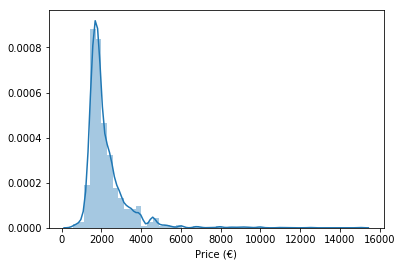

In [79]:
sns.distplot(rentaldata['Price (€)']) 

In [80]:
rentaldata[rentaldata['Price (€)']>10000] #houses over 10k doesnt make sense.

,AdName,Zipcode,Area,Description,Surface (m²),Bedrooms,Furniture,Price (€),Monthly,encryption,Site,Lat,Lon,newLat,newLon
1202,Bachstraat,1077 GD,Stadsdeel Zuid,"Unieke 12 meter brede Amsterdamse Stadsvilla, ...",380.0,6,unknown,12500,(ex.),BU03634901,Paraius,NaN,NaN,NaN,NaN
1426,Oudezijds Achterburgwal,NaN,Stadsdeel Centrum,FRIENDS CONCEPT POSSIBLE and ENGLISH TEXT BELO...,NaN,9,Unfurnished,11000,NaN,BU03630004,ExpatRental,52.371998,4.897133,487005.783364,121535.989299
2041,Bachstraat,NaN,Stadsdeel Zuid,"Unique 12m wide Amsterdam City villa, consisti...",50.0,4,Unfurnished,15000,NaN,BU03634901,ExpatRental,52.349199,4.879755,484862.729916,120360.493338


In [81]:
rentaldata=rentaldata[rentaldata['Price (€)']<14000]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


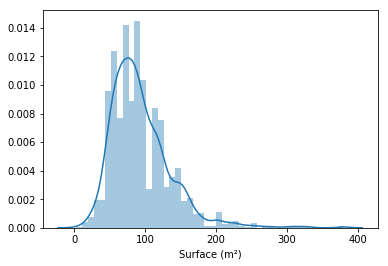

In [82]:
X=rentaldata["Surface (m²)"].dropna(how='any')
sns.distplot(X) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


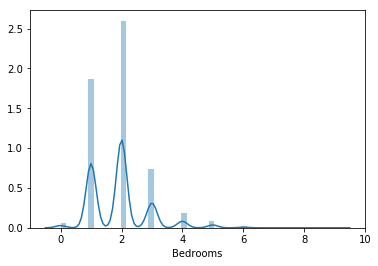

In [83]:
X=rentaldata["Bedrooms"].dropna(how='any')
sns.distplot(X) 

In [84]:
rentaldata["Price per m²"]=rentaldata['Price (€)']/rentaldata["Surface (m²)"]
rentaldata["Price per number of bedrooms"]=rentaldata['Price (€)']/(rentaldata["Bedrooms"]+1)

In [85]:
rentaldata[rentaldata["Price per m²"]>0]["Price per m²"].describe()

count    1565.000000
mean       25.736697
std        16.366744
min         8.139535
25%        20.481928
50%        24.166667
75%        28.666667
max       565.000000
Name: Price per m², dtype: float64

In [86]:
rentaldata["Price per m²"].describe()

count    1565.000000
mean       25.736697
std        16.366744
min         8.139535
25%        20.481928
50%        24.166667
75%        28.666667
max       565.000000
Name: Price per m², dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


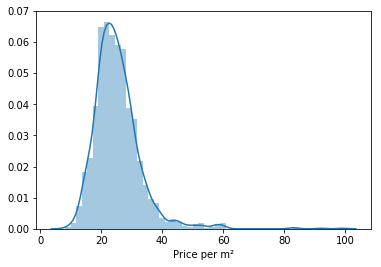

In [87]:
sns.distplot(rentaldata[((rentaldata["Price per m²"]<120) & (rentaldata["Price per m²"]>0))]["Price per m²"]) 

In [88]:
import scipy
scipy.stats.normaltest(rentaldata["Price per m²"])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1404: RuntimeWarning: invalid value encountered in less
  term2 = np.where(denom < 0, term1, np.power((1-2.0/A)/denom, 1/3.0))


NormaltestResult(statistic=nan, pvalue=nan)

In [89]:
#filter wrongly collected data, 
rentaldata=rentaldata[((rentaldata['Price per m²']<120) & (rentaldata['Price per m²']>0))]
rentaldata=rentaldata[((rentaldata['Price per number of bedrooms']<2000) & (rentaldata['Price per number of bedrooms']>0))]

In [90]:
rentaldata.shape #almost 700 lost

(1552, 17)

In [91]:
rentaldata.groupby(['Area'])['encryption'].count()

Area
Stadsdeel Centrum       549
Stadsdeel Nieuw-West     87
Stadsdeel Noord          37
Stadsdeel Oost          118
Stadsdeel West          206
Stadsdeel Westpoort       9
Stadsdeel Zuid          466
Stadsdeel Zuidoost       29
Name: encryption, dtype: int64

In [92]:
Rentgroup=rentaldata.groupby(['encryption']).mean()
Rentgroup.reset_index(level=0, inplace=True)
Rentgroup.head()
Rentgroup.shape

(229, 10)

## 4.2 Merging and Saving

In [93]:
DATA=pd.merge(rentaldata,CBS17,  how='left',on='encryption')
DATA.shape

(1552, 98)

In [94]:
DATA.head()

,AdName,Zipcode,Area,Description,Surface (m²),Bedrooms,Furniture,Price (€),Monthly,encryption,...,dutch total,DistancetoCenter,newCLat,newCLon,realCLat,realCLon,distance to gp practice;,distance to large supermarket,distance to nursery,distance to school
0,Van Tuyll van Serooskerkenplein,1076 NB,Stadsdeel Zuid,"Amazing, modern double floor apartment (140m2)...",140.0,3,furnished,2995,(ex.),BU03634801,...,895.0,3424.008737,484645.504035,119398.671911,52.346888,4.865536,0.2,0.2,0.2,0.1
1,Beethovenstraat,1077 JN,Stadsdeel Zuid,Newly renovated small studio for rent at a per...,18.0,1,furnished,900,(incl.),BU03634903,...,870.0,3022.583084,484775.016072,119934.238357,52.348266,4.873453,0.3,0.5,0.2,0.2
2,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
3,Titus van Rijnstraat,1058 GB,Stadsdeel Nieuw-West,Stunning modern stylish 2 bedroom furnished ap...,85.0,2,furnished,1900,(ex.),BU03638701,...,595.0,3733.564445,485463.245085,118067.840647,52.355588,4.845861,0.8,0.7,0.2,0.6
4,Uiterwaardenstraat,1079 CN,Stadsdeel Zuid,"Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...",85.0,2,furnished or unfurnished,2200,(ex.),BU03635203,...,1595.0,3478.607035,484198.291218,122020.043356,52.342131,4.904289,0.2,0.3,0.1,0.3


In [95]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Data.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
DATA.to_excel(writer)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer2 = pd.ExcelWriter('RentwithBuurtcode.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
rentaldata.to_excel(writer2)

# Close the Pandas Excel writer and output the Excel file.
writer2.save()

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer3 = pd.ExcelWriter('CBS17.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
CBS17.to_excel(writer3)

# Close the Pandas Excel writer and output the Excel file.
writer3.save()